## Learning the Alphabet

This is an example of a simple [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory) that is powerful enough to learn the alphabet. It is trained with strings that look like the alphabet.

While this seems trivial, RNNs are capable of learning more complex text sequences, such as the works of Shakespeare or computer source code. Although training RNNs is computationally more expensive compared with other network structures, this example is simple enough to train on a CPU.

In [1]:
# See https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/
# Small LSTM Network to Generate Text for Alice in Wonderland
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Training Data

The training data is generated using characters from 'a' to 'z'. Several sequences are concatenated to produce a longer sequence of characters.

In [2]:
# load ascii text and covert to lowercase
raw_text = ''.join([chr(x) for x in range(ord('a'), ord('z')+1)])
raw_text += raw_text
raw_text += raw_text
raw_text += raw_text
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

print("Subset of training data: %s" % raw_text[0:64])
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Subset of training data: abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyzabcdefghijkl
Total Characters:  208
Total Vocab:  26


## Prepare Sequences

Input and expected output sequences are prepared and encoded as integers.

In [3]:
seq_length = 10
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  198


## Train Model

In [4]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
#filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint]
# fit the model
#model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)
history = model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 3.2691
Epoch 2/100
 - 1s - loss: 3.2344
Epoch 3/100
 - 2s - loss: 3.1111
Epoch 4/100
 - 2s - loss: 2.7656
Epoch 5/100
 - 2s - loss: 2.4020
Epoch 6/100
 - 2s - loss: 2.1680
Epoch 7/100
 - 2s - loss: 2.0238
Epoch 8/100
 - 2s - loss: 1.9023
Epoch 9/100
 - 2s - loss: 1.8063
Epoch 10/100
 - 1s - loss: 1.7181
Epoch 11/100
 - 1s - loss: 1.6487
Epoch 12/100
 - 2s - loss: 1.5739
Epoch 13/100
 - 2s - loss: 1.5074
Epoch 14/100
 - 1s - loss: 1.4387
Epoch 15/100
 - 1s - loss: 1.3887
Epoch 16/100
 - 1s - loss: 1.3486
Epoch 17/100
 - 2s - loss: 1.2746
Epoch 18/100
 - 1s - loss: 1.2188
Epoch 19/100
 - 2s - loss: 1.1613
Epoch 20/100
 - 2s - loss: 1.1377
Epoch 21/100
 - 2s - loss: 1.0963
Epoch 22/100
 - 2s - loss: 1.1027
Epoch 23/100
 - 2s - loss: 1.0026
Epoch 24/100
 - 2s - loss: 0.9680
Epoch 25/100
 - 2s - loss: 0.9487
Epoch 26/100
 - 2s - loss: 0.9370
Epoch

## Model Loss

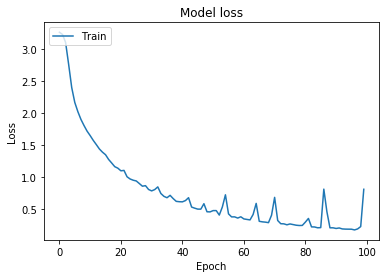

Minimum loss: 0.807


In [5]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
print("Minimum loss: %.3f" % history.history['loss'][-1])

## Prediction

A random starting sequence is used to seed prediction. The output is almost perfect.

In [6]:
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
#pattern = [start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(100):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nAll done!")

Seed:
" stuvwxyzab "
cdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwx
All done!
